<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Diferencia_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de diferencias progresivas (FTCS)

**Asignatura:** Ecuaciones Diferenciales Parciales  
**Nombre:** Karla Michelle Soriano Sánchez  
**Grupo:** 6MM1 – ESFM IPN  


Elaborar en Jupyter Notebook (Google Colab) la solución al problema de la ecuación del calor planteado en la imagen (es el que se resolvió en clase) usando diferencias progresivas (hacia adelante). La Notebook debe incluir:

1.  Comentarios y documentación.
2.  Comparación tabular de la solución numérica contra la analítica (anexo imagen muestra).
3.  Comparación gráfica de la solución numérica contra la analítica.
4. Comentario sobre la razón de las diferencias obtenidas al variar h y k, según lo solicita el problema.




Use los tamaños de paso:
a) h = 0.1 y k = 0.0005 y b) h = 0.1 y k = 0.01 para aproximar la solución de la ecuación de calor:
$$
\frac{∂u}{∂t}(x,t)-\frac{∂^2u}{∂x^2}(x,t) = 0 \quad 0<x<1, \quad 0 \leq t
$$

Con  condiciones de frontera:
$$
u(0,t) = u(1,t) = 0 , \quad 0<t
$$

Condiciones inciales:
$$
u(x,0) = sin (\pi x) = 0 , \quad 0 \leq x \leq 1
$$

Compare los resultados en $t=0.5$ con la solución exacta:

## Objetivo
Resolver la ecuación del calor unidimensional mendiante el método explicito (Diferencias finitas hacia delante) y comparar la solución numérica con la solución analítica en \(t=0.5\).
$
u(x,t)=e^{-\pi^2 t}\sin(\pi x)
$

Se estudiarán dos configuraciones:
- $h = 0.1,\; k = 0.0005$→ **estable**  
- $h = 0.1,\; k = 0.01$ → **inestable**

y se analizará la razón de malla $r=k/h^2$ con la condición de estabilidad $r\le 1/2$


Importación de librerias

In [25]:
# ================================================================
#  Ecuación de Calor 1D — FTCS (diferencias progresivas, “hacia adelante”)
#  PDE:  u_t - u_xx = 0,     0 < x < 1,  t > 0
#  BC:   u(0,t) = u(1,t) = 0
#  IC:   u(x,0) = sin(pi x)
#  Exacta: u(x,t) = exp(-pi^2 t) * sin(pi x)
#
#  Objetivo del notebook:
#   a) Implementar FTCS con h=0.1 y k en {0.0005 (estable), 0.01 (inestable)}.
#   b) Comparar en t=0.5 contra la solución analítica (tabla y gráficas).
#   c) Comentar la razón de malla r = k/h^2 y la condición de estabilidad r <= 1/2.
# ================================================================

from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from typing import Dict, Tuple

1. Definir los parámetros espaciales y temporales

In [26]:
h: float = 0.1                       # paso espacial (Δx)
x: np.ndarray = np.arange(0.0, 1.0 + h, h)  # nodos en [0,1] incluyendo fronteras
t_final: float = 0.5                 # instante de tiempo para comparar


2. Función de la solución analítica, es decir obtener las solución exacta

In [56]:
def u_exact(x: np.ndarray, t: float) -> np.ndarray:
    """
    Calcula la solución analítica exacta de la ecuación del calor.
    Evalúa la solución exacta u(x,t) = exp(-pi^2 t) * sin(pi x) punto a punto.

    Parámetros
    ---------
    x : np.ndarray
        Vector de nodos espaciales.
    t : float
        Tiempo en el que evaluar la solución.
    Retorna
    -------
    u : valores de la solución exacta en los nodos x
    """
    return np.exp(-(pi**2) * t) * np.sin(pi * x)

3. Implementar el método de diferencias progresivas para la ecuación de calor.

In [37]:
# ------------------------------------------------
# Método explícito FTCS (Forward-Time Central-Space)
# ------------------------------------------------
def ftcs_heat(x: np.ndarray, h: float, k: float, t_final: float) -> Tuple[np.ndarray, float, int]:
    """
    Aplica el esquema FTCS para resolver u_t = u_xx con condiciones
    de frontera homogéneas(fronteras de Dirichlet): u(0,t)=u(1,t)=0.

    Ecuación de actualización  en nodos internos i=1..N-2:
        u_i^{n+1} = r*u_{i-1}^n + (1-2r)*u_i^n + r*u_{i+1}^n,
    donde r = k / h².
    """
    """
     Parametros
    ----------
    x : np.ndarray
        Nodos espaciales (incluye 0 y 1).
    h : float
        Paso espacial Δx.
    k : float
        Paso temporal Δt.
    t_final : float
        Tiempo final de integración.

    Returns
    -------
    u : np.ndarray
        Aproximación numérica en t = t_final.
    r : float
        Razón de malla r = k/h^2 (clave para estabilidad).
    m : int
        Número de pasos temporales ejecutados (m ≈ t_final / k).
    """
    r: float = k / (h**2)
    m: int = int(round(t_final / k))

    # Condición inicial
    u: np.ndarray = np.sin(pi * x)
    # Condiciones de frontera homogéneas
    u[0], u[-1] = 0.0, 0.0

    # Bucle temporal
    for _ in range(m):
        u_new = u.copy()
        u_new[1:-1] = r*u[:-2] + (1 - 2*r)*u[1:-1] + r*u[2:]
        u_new[0], u_new[-1] = 0.0, 0.0
        u = u_new

    return u, r, m


4. Aplicar los dos casos solicitados

In [39]:
u_tfinal: np.ndarray = u_exact(x, t_final)  # referencia analítica en t=0.5

k_values = [0.0005, 0.01]  # k=0.0005 es estable (r=0.05), k=0.01 es inestable (r=1)
results: Dict[float, Dict[str, object]] = {}

for k in k_values:
    u_num, r, m = ftcs_heat(x, h, k, t_final)
    results[k] = {"u": u_num, "r": r, "m": m}


5. Realizar la comparación tabular (númerica vs analítica)

In [53]:
# Construimos la tabla con la notación u(x,t)
tabla = pd.DataFrame({
    "x_i": x,
    "u(x_i,0.5)": u_tfinal,
    "u_i num (k=0.0005)": results[0.0005]["u"],
    "|u - u_num| (k=0.0005)": np.abs(u_tfinal - results[0.0005]["u"]),
    "u_i num (k=0.01)": results[0.01]["u"],
    "|u - u_num| (k=0.01)": np.abs(u_tfinal - results[0.01]["u"]),
})

# Mostramos la tabla con formato claro
with pd.option_context("display.precision", 8, "display.max_rows", None, "display.width", 140):
    display(tabla)


,x_i,"u(x_i,0.5)",u_i num (k=0.0005),|u - u_num| (k=0.0005),u_i num (k=0.01),|u - u_num| (k=0.01)
0,0.0,0.00000000e+00,0.00000000,0.00000000e+00,0.00000000e+00,0.00000000e+00
1,0.1,2.22241418e-03,0.00228652,6.41066081e-05,3.45403241e+05,3.45403239e+05
2,0.2,4.22728297e-03,0.00434922,1.21938015e-04,-6.55930760e+05,6.55930765e+05
3,0.3,5.81835586e-03,0.00598619,1.67833279e-04,9.00526926e+05,9.00526920e+05
4,0.4,6.83988753e-03,0.00703719,1.97299852e-04,-1.05524767e+06,1.05524768e+06
5,0.5,7.19188336e-03,0.00739934,2.07453342e-04,1.10560546e+06,1.10560546e+06
6,0.6,6.83988753e-03,0.00703719,1.97299852e-04,-1.04773691e+06,1.04773692e+06
7,0.7,5.81835586e-03,0.00598619,1.67833279e-04,8.88374259e+05,8.88374253e+05
8,0.8,4.22728297e-03,0.00434922,1.21938015e-04,-6.43778093e+05,6.43778097e+05
9,0.9,2.22241418e-03,0.00228652,6.41066081e-05,3.37892479e+05,3.37892477e+05


5. Graficas de comparación: exata vs númerica

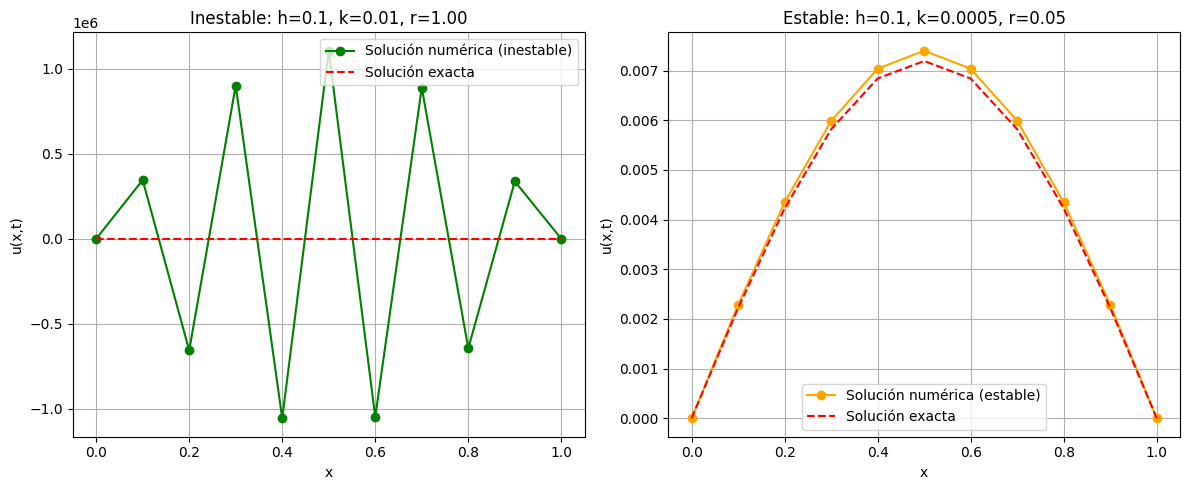

In [50]:
# ------------------------------------------------
# Comparación gráfica: Caso inestable y estable (subplots)
# ------------------------------------------------

# Parámetros
k_inestable = 0.01      # produce r = 1.0 (inestable)
k_estable = 0.0005      # produce r = 0.05 (estable)

# Solución exacta
u_tfinal = u_exact(x, t_final)

# Cálculo de soluciones numéricas (usando tu misma función ftcs_heat)
u_inestable, r_inest, m_inest = ftcs_heat(x, h, k_inestable, t_final)
u_estable, r_est, m_est = ftcs_heat(x, h, k_estable, t_final)

# ------------------------------------------------
# Gráficas lado a lado
# ------------------------------------------------
plt.figure(figsize=(12,5))

# Subgráfica 1: Inestable
plt.subplot(1,2,1)
plt.plot(x, u_inestable, 'o-', color='green', label='Solución numérica (inestable)')
plt.plot(x, u_tfinal, 'r--', label='Solución exacta')
plt.title(f"Inestable: h={h}, k={k_inestable}, r={r_inest:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)

# Subgráfica 2: Estable
plt.subplot(1,2,2)
plt.plot(x, u_estable, 'o-', color='orange', label='Solución numérica (estable)')
plt.plot(x, u_tfinal, 'r--', label='Solución exacta')
plt.title(f"Estable: h={h}, k={k_estable}, r={r_est:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Interpretación de las gráficas

Las figuras muestran el comportamiento del método explícito FTCS (Forward-Time Central-Space)
para la ecuación del calor 1D bajo dos configuraciones del paso temporal $k$

- **Gráfica izquierda (inestable):**
  $
  h = 0.1, \quad k = 0.01, \quad r = \frac{k}{h^2} = 1.0 > 0.5
  $
  En este caso, se viola la condición de estabilidad $r \leq \frac{1}{2}$,
  y la solución numérica **diverge**, presentando oscilaciones crecientes y valores
  físicamente imposibles. El método FTCS se vuelve **inestable**.

- **Gráfica derecha (estable):**
  $
  h = 0.1, \quad k = 0.0005, \quad r = 0.05 \leq 0.5
  $
  Aquí se cumple la condición de estabilidad. La solución numérica **coincide casi exactamente**
  con la solución analítica $u(x,t) = e^{-\pi^2 t} \sin(\pi x)$
  mostrando un comportamiento suave y físicamente correcto.

Estas gráficas confirman que la estabilidad del método FTCS depende directamente
del valor de la razón de malla $r= \frac{k}{h^2}$.
Cuando $r$ supera 0.5, los errores se amplifican exponencialmente con cada paso de tiempo,
y la aproximación pierde sentido físico.


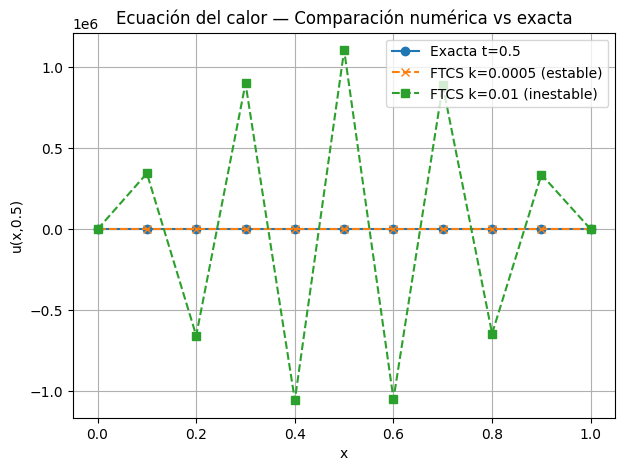

In [42]:
# ------------------------------------------------
# Gráfica de comparación: exacta vs numérica
# ------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(x, u_tfinal, marker="o", label="Exacta t=0.5")
plt.plot(x, results[0.0005]["u"], marker="x", linestyle="--", label="FTCS k=0.0005 (estable)")
plt.plot(x, results[0.01]["u"], marker="s", linestyle="--", label="FTCS k=0.01 (inestable)")
plt.title("Ecuación del calor — Comparación numérica vs exacta")
plt.xlabel("x")
plt.ylabel("u(x,0.5)")
plt.grid(True)
plt.legend()
plt.show()


6. Comentario sobre la razón de las diferencias obtenidas al variar h y k, según lo solicita el problema.


In [36]:
# ------------------------------------------------
# Comentario sobre estabilidad
# ------------------------------------------------
print("Condición de estabilidad FTCS:  r = k/h^2 <= 1/2")
print(f"h = {h:.2f}  ->  h^2 = {h**2:.4f}")
for k in k_values:
    print(f"k = {k:.6f}  ->  r = {results[k]['r']:.3f}   (m = {results[k]['m']})")

print("""
• Para k = 0.0005 → r = 0.05 ≤ 0.5  → método estable: la solución numérica coincide con la exacta.
• Para k = 0.01   → r = 1.00  > 0.5  → método inestable: aparecen oscilaciones y crecimientos no físicos.
""")


Condición de estabilidad FTCS:  r = k/h^2 <= 1/2
h = 0.10  ->  h^2 = 0.0100
k = 0.000500  ->  r = 0.050   (m = 1000)
k = 0.010000  ->  r = 1.000   (m = 50)

• Para k = 0.0005 → r = 0.05 ≤ 0.5  → método estable: la solución numérica coincide con la exacta.
• Para k = 0.01   → r = 1.00  > 0.5  → método inestable: aparecen oscilaciones y crecimientos no físicos.




Al variar los tamaños de paso $h$ y $k$ en el método FTCS, se modifica la **razón de malla**:
$
r = \frac{k}{h^2}
$

Esta razón controla la **estabilidad y precisión** del método.  

- Cuando $r \leq 0.5$, el esquema explícito es **estable**: los errores numéricos se mantienen acotados y la solución $u(x,t)$ evoluciona de forma suave, reproduciendo fielmente el comportamiento de la ecuación del calor.

- Cuando $r > 0.5$, el método se vuelve **inestable**:los errores de redondeo se amplifican en cada iteración temporal, provocando oscilaciones y valores crecientes que no tienen significado físico. Esto ocurre, por ejemplo, con $k = 0.01$

Además, un valor más pequeño de $k$ implica una integración más fina en el tiempo, aumentando la precisión pero también el número de iteraciones necesarias.

En conclusión, las diferencias observadas al variar $h$ y $k$ se deben a la relación entre ambos pasos a través de $r = k/h^2$.  
Una elección adecuada de estos parámetros garantiza un equilibrio entre
**estabilidad numérica** y **eficiencia computacional** en la simulación.


7. Grafica en 3D

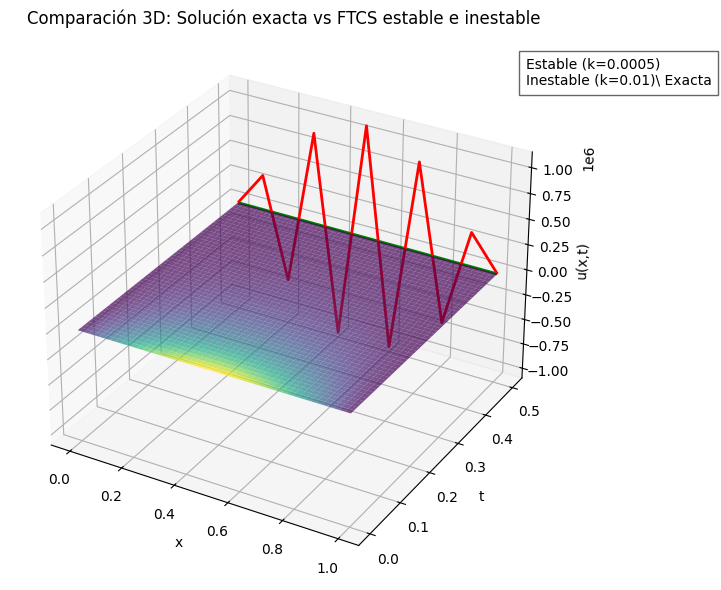

In [59]:
# ============================================================
# Gráfica 3D: Solución exacta vs FTCS estable e inestable
# ============================================================
from mpl_toolkits.mplot3d import Axes3D



# --- Recuperamos datos ---
k_estable = 0.0005
k_inestable = 0.01

u_estable = results[k_estable]["u"] if "u" in results[k_estable] else results[k_estable]["w"]
u_inestable = results[k_inestable]["u"] if "u" in results[k_inestable] else results[k_inestable]["w"]

r_est = results[k_estable]["r"]
r_inest = results[k_inestable]["r"]
m_est = results[k_estable]["m"]
m_inest = results[k_inestable]["m"]

# --- Ejes de tiempo (solo para graficar una capa en t = 0.5) ---
t_est = np.array([t_final])
t_inest = np.array([t_final])

# --- Solución exacta en malla fina ---
x_f = np.linspace(0, 1, 50)
t_f = np.linspace(0, t_final, 50)
Xf, Tf = np.meshgrid(x_f, t_f)
u_exacta = np.exp(-np.pi**2 * Tf) * np.sin(np.pi * Xf)

# --- Mallas para los casos numéricos (1 fila 2D) ---
X_est, T_est = np.meshgrid(x, t_est)
X_inest, T_inest = np.meshgrid(x, t_inest)

Z_est = np.tile(u_estable, (1, 1))  # convierte en matriz 2D
Z_inest = np.tile(u_inestable, (1, 1))

# --- Gráfica 3D ---
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111, projection='3d')

# Superficie analítica
ax.plot_surface(Xf, Tf, u_exacta, cmap='viridis', alpha=0.7)

# Rejilla estable
ax.plot_wireframe(X_est, T_est, Z_est, color='green', linewidth=2, label='FTCS Estable (k=0.0005)')

# Rejilla inestable
ax.plot_wireframe(X_inest, T_inest, Z_inest, color='red', linewidth=2, label='FTCS Inestable (k=0.01)')

# Etiquetas
ax.set_title("Comparación 3D: Solución exacta vs FTCS estable e inestable")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")

# Leyenda manual
plt.figtext(0.72, 0.85,
             "Estable (k=0.0005)\nInestable (k=0.01)\ Exacta",
             fontsize=10, bbox={"facecolor":"white","alpha":0.6,"pad":5})

plt.tight_layout()
plt.show()


## Conclusión

El método explícito permite aproximar la solución de la ecuación del calor siempre que la razon de malla $r = k/h^2$ cumpla $r \le 0.5$.
Los resultados muestran que:
- Para $k=0.0005$, la solución númerica sigue el comportamiento senoidal esperado.
- Para $k=0.01$, la solución diverge debido a que no cumple la condicón de estabilidad.
Por lo tanto, la elección adecuada de los pasos $h$ y $k$ garantiza que el método proporcione resultados precisos y fisicamente coherentes.

